# 概要
## データの読み込み、前処理
+ NIIのIRDB(https://irdb.nii.ac.jp/)の統計データを取得し、Pandas のDataFrameに読み込む

In [2]:
import pandas as pd
!python -V
print('Pandas',pd.__version__)

Python 3.9.7
Pandas 1.3.5


In [3]:
import pandas as pd
# df = pd.read_excel('2022irdb.xlsx', index_col=0)
df = pd.read_csv('data/2023.csv', index_col=0)
print(df.tail(5))

                    機関名              リポジトリ名   対象年  対象月  総件数  本文あり件数  DOI付与件数  \
タイトル                                                                           
2023年01月       九州大谷短期大学     九州大谷短期大学機関リポジトリ  2023    1   29      29        0   
2023年01月    芸術文化観光専門職大学  芸術文化観光専門職大学機関リポジトリ  2023    1   20      20        0   
2023年01月  せとうち観光専門職短期大学         せとうち観光リポジトリ  2023    1   20      20       14   
2023年01月         香川短期大学         香川短期大学リポジトリ  2023    1  129     129        0   
2023年01月      ユマニテク短期大学    ユマニテク短期大学学術リポジトリ  2023    1   61      61        2   

          embargoed access(全件数)  metadata only access(全件数)  \
タイトル                                                         
2023年01月                      0                          0   
2023年01月                      0                          0   
2023年01月                      0                          0   
2023年01月                      0                          0   
2023年01月                      0                          0   

    

In [4]:
# 統計データから、ある月分を抽出
df2205 = df.loc['2023年01月']
df2205.tail(2)

,機関名,リポジトリ名,対象年,対象月,総件数,本文あり件数,DOI付与件数,embargoed access(全件数),metadata only access(全件数),restricted access(全件数),...,research proposal(本文あり),software(本文あり).1,technical documentation(本文あり),workflow(本文あり),data management plan(本文あり),interview(本文あり),manuscript(本文あり),newspaper(本文あり),software paper(本文あり),other(本文あり)
タイトル,,,,,,,,,,,,,,,,,,,,,
2023年01月,香川短期大学,香川短期大学リポジトリ,2023,1,129,129,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023年01月,ユマニテク短期大学,ユマニテク短期大学学術リポジトリ,2023,1,61,61,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 機関名をインデクスにセット
df2205i = df2205.set_index('機関名')
print(df2205i)

                           リポジトリ名   対象年  対象月    総件数  本文あり件数  DOI付与件数  \
機関名                                                                    
横浜国立大学            横浜国立大学学術情報リポジトリ  2023    1  11937   11828     2132   
横浜商科大学              横浜商科大学機関リポジトリ  2023    1   1546    1546        0   
横浜市立大学            横浜市立大学学術機関リポジトリ  2023    1   2180    2154      566   
安田女子大学                安田女子大学リポジトリ  2023    1    553     553      552   
山梨県立大学              山梨県立大学機関リポジトリ  2023    1   1378    1378        0   
...                           ...   ...  ...    ...     ...      ...   
九州大谷短期大学          九州大谷短期大学機関リポジトリ  2023    1     29      29        0   
芸術文化観光専門職大学    芸術文化観光専門職大学機関リポジトリ  2023    1     20      20        0   
せとうち観光専門職短期大学         せとうち観光リポジトリ  2023    1     20      20       14   
香川短期大学                香川短期大学リポジトリ  2023    1    129     129        0   
ユマニテク短期大学        ユマニテク短期大学学術リポジトリ  2023    1     61      61        2   

               embargoed access(全件数)  metadata only access(全件数)

In [6]:
# df2205iを全件数と、本文ありとに分け、差分（メタデータのみ）を取り出す。
# print(df2205i.iloc[:,17:64].columns)
# print(df2205i.iloc[:,75:].columns)
df2205_all = df2205i.iloc[:,17:64]
df2205_honbun = df2205i.iloc[:,75:]

df2205_all.set_axis(['conference paper', 'data paper',
       'departmental bulletin paper', 'editorial',
       'journal article', 'periodical', 'review article',
       'article', 'book', 'book part',
       'cartographic material', 'map', 'conference object',
       'conference proceedings', 'conference poster', 'dataset',
       'image', 'still image', 'moving image', 'video',
       'lecture', 'patent', 'internal report', 'report',
       'research report', 'technical report', 'policy report',
       'report part', 'working paper', 'sound', 'thesis',
       'bachelor thesis', 'master thesis', 'doctoral thesis',
       'interactive resource', 'learning object',
       'musical notation', 'research proposal', 'software',
       'technical documentation', 'workflow',
       'data management plan', 'interview', 'manuscript',
       'newspaper', 'software paper', 'other'], axis=1, inplace=True)
       
df2205_honbun.set_axis(['conference paper', 'data paper',
       'departmental bulletin paper', 'editorial',
       'journal article', 'periodical', 'review article',
       'article', 'book', 'book part',
       'cartographic material', 'map', 'conference object',
       'conference proceedings', 'conference poster', 'dataset',
       'image', 'still image', 'moving image', 'video',
       'lecture', 'patent', 'internal report', 'report',
       'research report', 'technical report', 'policy report',
       'report part', 'working paper', 'sound', 'thesis',
       'bachelor thesis', 'master thesis', 'doctoral thesis',
       'interactive resource', 'learning object',
       'musical notation', 'research proposal', 'software',
       'technical documentation', 'workflow',
       'data management plan', 'interview', 'manuscript',
       'newspaper', 'software paper', 'other'], axis=1, inplace=True)
# df2205_all.tail(2)
# df2205_honbun.tail(2)
# 全体-本文の差分（メタデータのみ）
df2205_sabun = df2205_all - df2205_honbun
df2205_sabun.describe()        # sample(5)


,conference paper,data paper,departmental bulletin paper,editorial,journal article,periodical,review article,article,book,book part,...,research proposal,software,technical documentation,workflow,data management plan,interview,manuscript,newspaper,software paper,other
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,...,792.0,792.000000,792.0,792.0,792.0,792.0,792.0,792.0,792.0,792.000000
mean,190.881313,0.001263,218.449495,0.026515,280.156566,1.857323,0.002525,162.296717,21.148990,0.142677,...,0.0,0.012626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.511364
std,4793.964696,0.035533,921.097284,0.648292,5110.678266,36.946212,0.071067,3795.890520,457.071341,3.841499,...,0.0,0.355335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,694.034202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,16.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,134511.000000,1.000000,12308.000000,18.000000,142211.000000,752.000000,2.000000,106226.000000,12830.000000,108.000000,...,0.0,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12313.000000


# 47個の資源タイプを、大項目13個にまとめる

In [7]:
# 13項目に列をまとめる(全件)
df2205_all['Kiyou'] = df2205_all['departmental bulletin paper']

df2205_all['Article'] =  df2205_all['conference paper']
+df2205_all['data paper']
+df2205_all['editorial']
+df2205_all['journal article']
+df2205_all['newspaper']
+df2205_all['periodical']
+df2205_all['review article']
+df2205_all['software paper']
+df2205_all['article']

df2205_all['Book'] = df2205_all['book']
+df2205_all['book part']

df2205_all['Cartographic Material'] = df2205_all['cartographic material']
+df2205_all['map']

df2205_all['Conference object'] = df2205_all['conference object']
+df2205_all['conference proceedings']
+df2205_all['conference poster']

df2205_all['Dataset'] = df2205_all['dataset']
+df2205_all['interview']

df2205_all['Image'] = df2205_all['image']
+df2205_all['still image']
+df2205_all['moving image']
+df2205_all['video']

df2205_all['Lecture'] = df2205_all['lecture']
df2205_all['Patent'] = df2205_all['patent']

df2205_all['Report'] = df2205_all['internal report']
+df2205_all['report']
+df2205_all['research report']
+df2205_all['technical report']
+df2205_all['policy report']
+df2205_all['report part']
+df2205_all['working paper']
+df2205_all['data management plan']

df2205_all['Sound'] = df2205_all['sound']

df2205_all['Thesis'] = df2205_all['thesis']
+df2205_all['bachelor thesis']
+df2205_all['master thesis']
+df2205_all['doctoral thesis']

df2205_all['Multiple'] = df2205_all['interactive resource']
+df2205_all['learning object']
+df2205_all['manuscript']
+df2205_all['musical notation']
+df2205_all['research proposal']
+df2205_all['software']
+df2205_all['technical documentation']
+df2205_all['workflow']
+df2205_all['other']

機関名
横浜国立大学           1153
横浜商科大学            722
横浜市立大学            211
安田女子大学              0
山梨県立大学              4
                 ... 
九州大谷短期大学            1
芸術文化観光専門職大学         0
せとうち観光専門職短期大学       0
香川短期大学              0
ユマニテク短期大学           0
Name: other, Length: 792, dtype: int64

In [8]:
# 13項目に列をまとめる（本文あり）
df2205_honbun['Kiyou'] = df2205_honbun['departmental bulletin paper']

df2205_honbun['Article'] = df2205_honbun['conference paper']
+df2205_honbun['data paper']
+df2205_honbun['editorial']
+df2205_honbun['journal article']
+df2205_honbun['newspaper']
+df2205_honbun['periodical']
+df2205_honbun['review article']
+df2205_honbun['software paper']
+df2205_honbun['article']

df2205_honbun['Book'] = df2205_honbun['book']
+df2205_honbun['book part']

df2205_honbun['Cartographic Material'] = df2205_honbun['cartographic material']
+df2205_honbun['map']

df2205_honbun['Conference object'] = df2205_honbun['conference object']
+df2205_honbun['conference proceedings']
+df2205_honbun['conference poster']

df2205_honbun['Dataset'] = df2205_honbun['dataset']
+df2205_honbun['interview']

df2205_honbun['Image'] = df2205_honbun['image']
+df2205_honbun['still image']
+df2205_honbun['moving image']
+df2205_honbun['video']

df2205_honbun['Lecture'] = df2205_honbun['lecture']
df2205_honbun['Patent'] = df2205_honbun['patent']

df2205_honbun['Report'] = df2205_honbun['internal report']
+df2205_honbun['report']
+df2205_honbun['research report']
+df2205_honbun['technical report']
+df2205_honbun['policy report']
+df2205_honbun['report part']
+df2205_honbun['working paper']
+df2205_honbun['data management plan']

df2205_honbun['Sound'] = df2205_honbun['sound']

df2205_honbun['Thesis'] = df2205_honbun['thesis']
+df2205_honbun['bachelor thesis']
+df2205_honbun['master thesis']
+df2205_honbun['doctoral thesis']

df2205_honbun['Multiple'] = df2205_honbun['interactive resource']
+df2205_honbun['learning object']
+df2205_honbun['manuscript']
+df2205_honbun['musical notation']
+df2205_honbun['research proposal']
+df2205_honbun['software']
+df2205_honbun['technical documentation']
+df2205_honbun['workflow']
+df2205_honbun['other']


機関名
横浜国立大学           1153
横浜商科大学            722
横浜市立大学            211
安田女子大学              0
山梨県立大学              4
                 ... 
九州大谷短期大学            1
芸術文化観光専門職大学         0
せとうち観光専門職短期大学       0
香川短期大学              0
ユマニテク短期大学           0
Name: other, Length: 792, dtype: int64

In [9]:
# 13項目に列をまとめる（差分：全件ー本文あり＝メタのみ）
df2205_sabun['Kiyou'] = df2205_sabun['departmental bulletin paper']

df2205_sabun['Article'] =  df2205_sabun['conference paper']
+df2205_sabun['data paper']
+df2205_sabun['editorial']
+df2205_sabun['journal article']
+df2205_sabun['newspaper']
+df2205_sabun['periodical']
+df2205_sabun['review article']
+df2205_sabun['software paper']
+df2205_sabun['article']

df2205_sabun['Book'] = df2205_sabun['book']
+df2205_sabun['book part']

df2205_sabun['Cartographic Material'] = df2205_sabun['cartographic material']
+df2205_sabun['map']

df2205_sabun['Conference object'] = df2205_sabun['conference object']
+df2205_sabun['conference proceedings']
+df2205_sabun['conference poster']

df2205_sabun['Dataset'] = df2205_sabun['dataset']
+df2205_sabun['interview']

df2205_sabun['Image'] = df2205_sabun['image']
+df2205_sabun['still image']
+df2205_sabun['moving image']
+df2205_sabun['video']

df2205_sabun['Lecture'] = df2205_sabun['lecture']
df2205_sabun['Patent'] = df2205_sabun['patent']

df2205_sabun['Report'] = df2205_sabun['internal report']
+df2205_sabun['report']
+df2205_sabun['research report']
+df2205_sabun['technical report']
+df2205_sabun['policy report']
+df2205_sabun['report part']
+df2205_sabun['working paper']
+df2205_sabun['data management plan']

df2205_sabun['Sound'] = df2205_sabun['sound']

df2205_sabun['Thesis'] = df2205_sabun['thesis']
+df2205_sabun['bachelor thesis']
+df2205_sabun['master thesis']
+df2205_sabun['doctoral thesis']

df2205_sabun['Multiple'] = df2205_sabun['interactive resource']
+df2205_sabun['learning object']
+df2205_sabun['manuscript']
+df2205_sabun['musical notation']
+df2205_sabun['research proposal']
+df2205_sabun['software']
+df2205_sabun['technical documentation']
+df2205_sabun['workflow']
+df2205_sabun['other']

機関名
横浜国立大学           0
横浜商科大学           0
横浜市立大学           0
安田女子大学           0
山梨県立大学           0
                ..
九州大谷短期大学         0
芸術文化観光専門職大学      0
せとうち観光専門職短期大学    0
香川短期大学           0
ユマニテク短期大学        0
Name: other, Length: 792, dtype: int64

In [10]:
# 13項目にまとめる（まとめた後不要項目をdrop）
df2205_all_d = df2205_all.drop(['departmental bulletin paper', 'conference paper', 'data paper', 'editorial', 'journal article', 'newspaper', 'periodical', 'review article', 'software paper', 'article', 'book', 'book part', 'cartographic material', 'map', 'conference object', 'conference proceedings', 'conference poster', 'dataset', 'interview', 'image', 'still image', 'moving image', 'video',
                                'lecture', 'patent', 'internal report', 'report', 'research report', 'technical report', 'policy report', 'report part', 'working paper', 'data management plan', 'sound', 'thesis', 'bachelor thesis', 'master thesis', 'doctoral thesis', 'interactive resource', 'learning object', 'manuscript', 'musical notation', 'research proposal', 'software', 'technical documentation', 'workflow', 'other'], axis=1)
df2205_honbun_d = df2205_honbun.drop(['departmental bulletin paper', 'conference paper', 'data paper', 'editorial', 'journal article', 'newspaper', 'periodical', 'review article', 'software paper', 'article', 'book', 'book part', 'cartographic material', 'map', 'conference object', 'conference proceedings', 'conference poster', 'dataset', 'interview', 'image', 'still image', 'moving image', 'video', 'lecture', 'patent', 'internal report', 'report', 'research report', 'technical report', 'policy report', 'report part', 'working paper', 'data management plan', 'sound', 'thesis', 'bachelor thesis', 'master thesis', 'doctoral thesis', 'interactive resource', 'learning object', 'manuscript', 'musical notation', 'research proposal', 'software', 'technical documentation', 'workflow', 'other'], axis=1)
df2205_sabun_d = df2205_sabun.drop(['departmental bulletin paper', 'conference paper', 'data paper', 'editorial', 'journal article', 'newspaper', 'periodical', 'review article', 'software paper', 'article', 'book', 'book part', 'cartographic material', 'map', 'conference object', 'conference proceedings', 'conference poster', 'dataset', 'interview', 'image', 'still image', 'moving image', 'video',
                                    'lecture', 'patent', 'internal report', 'report', 'research report', 'technical report', 'policy report', 'report part', 'working paper', 'data management plan', 'sound', 'thesis', 'bachelor thesis', 'master thesis', 'doctoral thesis', 'interactive resource', 'learning object', 'manuscript', 'musical notation', 'research proposal', 'software', 'technical documentation', 'workflow', 'other'], axis=1)
print(df2205_sabun_d)
print(df2205_honbun_d)
# print(df2205_all_d)


               Kiyou  Article  Book  Cartographic Material  Conference object  \
機関名                                                                             
横浜国立大学             4        0     2                      0                  0   
横浜商科大学             0        0     0                      0                  0   
横浜市立大学             1        0     0                      0                  0   
安田女子大学             0        0     0                      0                  0   
山梨県立大学             0        0     0                      0                  0   
...              ...      ...   ...                    ...                ...   
九州大谷短期大学           0        0     0                      0                  0   
芸術文化観光専門職大学        0        0     0                      0                  0   
せとうち観光専門職短期大学      0        0     0                      0                  0   
香川短期大学             0        0     0                      0                  0   
ユマニテク短期大学          0        

In [50]:
# DataFrameの概要をlatexフォーマットで出力（少数以下1桁に切り捨て）
# pandas.DataFrame.to_latex
pd.set_option('display.float_format', lambda x: '%.1f' % x)
print(df2205_all_d.describe().to_latex(index=True)) # .apply("{0:.5f}".format))
# defaultに戻す
pd.reset_option('display.float_format')

# \begin{tabular}{p{0.7cm}p{0.7cm}|p{0.7cm}|p{1cm}|p{1cm}|p{1cm}|p{1cm}|p{1cm}|p{1cm}|p{1cm}|p{1cm}|p{1cm}|p{1cm}|p{1cm}}
#	% \begin{tabular}{lrrrrrrrrrrrrr}


\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &    Kiyou &  Article &    Book &  Cartographic Material &  Conference object &  Dataset &  Image &  Lecture &  Patent &  Report &  Sound &  Thesis &  Multiple \\
\midrule
count &    792.0 &    792.0 &   792.0 &                  792.0 &              792.0 &    792.0 &  792.0 &    792.0 &   792.0 &   792.0 &  792.0 &   792.0 &     792.0 \\
mean  &   2011.5 &    249.6 &    78.3 &                    0.0 &               93.8 &    112.7 &    6.1 &      0.4 &     0.0 &     0.0 &    0.0 &   217.2 &       0.0 \\
std   &   5952.6 &   5051.3 &   643.6 &                    0.4 &             1151.1 &   1948.2 &  170.3 &     10.4 &     0.0 &     0.0 &    0.2 &  1201.0 &       0.0 \\
min   &      0.0 &      0.0 &     0.0 &                    0.0 &                0.0 &      0.0 &    0.0 &      0.0 &     0.0 &     0.0 &    0.0 &     0.0 &       0.0 \\
25\%   &    128.0 &      0.0 &     0.0 &                    0.0 &                0.0 &      0.0 &    0.0 &  

# 主成分分析をしてみる
https://corvus-window.com/python_pca/
https://qiita.com/maskot1977/items/082557fcda78c4cdb41f
主成分分析（principal component analysis）とは相関のある多数の変数から相関のない少数で全体のばらつきを最もよく表す主成分と呼ばれる変数を合成する多変量解析の一手法[1]。データの次元を削減するために用いられる。
この時点で、13次元のデータですので、その散布図を可視化することは不可能です。そこで、主成分分析を用いて情報をなるべく失うことなく2次元へと次元圧縮をし、データの可視化をおこなってみる

In [12]:
df2205_all_d.describe()

,Kiyou,Article,Book,Cartographic Material,Conference object,Dataset,Image,Lecture,Patent,Report,Sound,Thesis,Multiple
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.00000,792.000000,792.0,792.0,792.000000,792.000000,792.0
mean,2011.470960,249.575758,78.266414,0.013889,93.832071,112.719697,6.05303,0.373737,0.0,0.0,0.008838,217.159091,0.0
std,5952.557759,5051.349687,643.567847,0.357062,1151.114723,1948.205918,170.27623,10.446866,0.0,0.0,0.248734,1201.020552,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0
25%,128.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0
50%,482.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0
75%,1517.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,19.000000,0.0
max,123440.000000,140940.000000,12907.000000,10.000000,25743.000000,48965.000000,4792.00000,294.000000,0.0,0.0,7.000000,17369.000000,0.0


標準偏差が小さい(全体のバラツキが小さいということ、つまり、測定値の分布が平均値の周り に集まっているということ)列を削除

<AxesSubplot:>

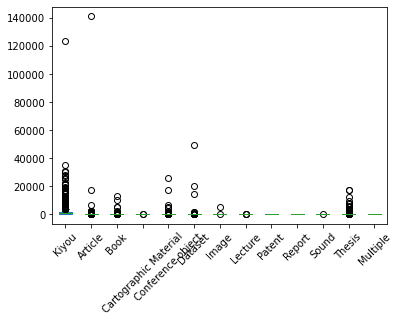

In [13]:
df2205_all_d.plot.box(rot=45)

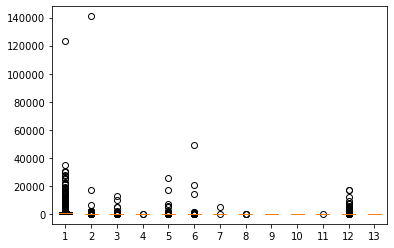

In [14]:
import matplotlib.pyplot as plt
# x = df2205_all_d.astype(float).to_numpy()
x = df2205_all_d
plt.boxplot(x, whis=0.5)  #whis=(0,100)だと全範囲
plt.savefig("result3.png")

In [15]:
# 主成分分析の前処理
# df2205_all.head(3)
# print(df2205_all.dropna(how='all', axis=1))
# 分散 var() 標準偏差 std()
# print(df2205_all.var())
# 分散がゼロの列を抽出
# print(df2205_all_d.var(axis=0) > 0.5)
# 標準偏差が1以下の列を抽出
print(df2205_all_d.std(axis=0) > 1)

Kiyou                     True
Article                   True
Book                      True
Cartographic Material    False
Conference object         True
Dataset                   True
Image                     True
Lecture                   True
Patent                   False
Report                   False
Sound                    False
Thesis                    True
Multiple                 False
dtype: bool


In [16]:
# 分散varが 0 の列を削除
# 3列削除されて、10列（10項目）になる
# 標準偏差 std が1以下の列を削除
# var0 = (df2205_all_d.var(axis=0) > 0)  # []リストではだめだった,== だと分散0の列が抽出される 
std0 = (df2205_all_d.std(axis=0) > 1)  # []リストではだめだった,== だと分散0の列が抽出される 
# df2205_all_d.index[df2205_all_d.var(axis=0) < 0]
df2205_all_dstd = df2205_all_d.loc[:, std0]
df2205_all_dstd


,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
機関名,,,,,,,,
横浜国立大学,7280,119,454,13,0,0,0,457
横浜商科大学,809,0,0,0,0,0,0,0
横浜市立大学,1042,0,0,0,0,0,0,757
安田女子大学,547,0,0,0,0,0,0,0
山梨県立大学,1104,0,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...
九州大谷短期大学,28,0,0,0,0,0,0,0
芸術文化観光専門職大学,20,0,0,0,0,0,0,0
せとうち観光専門職短期大学,13,0,0,0,0,0,0,0


In [17]:
df2205_all_dstd.describe()

,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.00000,792.000000,792.000000
mean,2011.470960,249.575758,78.266414,93.832071,112.719697,6.05303,0.373737,217.159091
std,5952.557759,5051.349687,643.567847,1151.114723,1948.205918,170.27623,10.446866,1201.020552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,128.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,482.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1517.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,19.000000
max,123440.000000,140940.000000,12907.000000,25743.000000,48965.000000,4792.00000,294.000000,17369.000000


<AxesSubplot:>

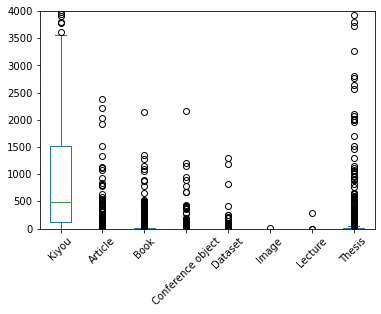

In [18]:
# df2205_all_dstd.plot.box(rot=45)
# Y軸を区切って表示する
df2205_all_dstd.plot.box(rot=45, ylim=[0,4000])

In [19]:
df2205_all_dstd[df2205_all_dstd['Kiyou']>40000]

,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
機関名,,,,,,,,
京都大学,123440,1520,871,1151,254,0,0,0


In [20]:
df2205_all_dstd[df2205_all_dstd['Article']>40000]

,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
機関名,,,,,,,,
東京工業大学,828,140940,12907,0,11,0,0,7579


In [21]:
df2205_all_dstd[df2205_all_dstd['Dataset']>40000]

,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
機関名,,,,,,,,
千葉大学,10558,91,136,2158,48965,0,0,1967


<AxesSubplot:>

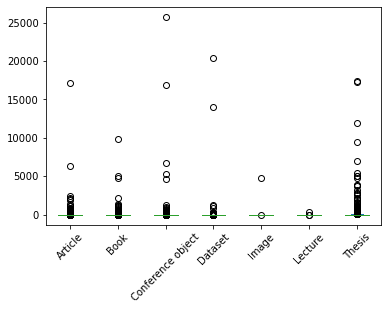

In [22]:
# 外れ値を指定して削除
# print(df2205_all_dstd.drop(['京都大学', '東京工業大学', '千葉大学']))
# 789 rows × 8 columns->[786 rows x 8 columns]
# df2205_all_dstd.drop(['京都大学', '東京工業大学', '千葉大学']).plot.box(rot=45)
# df2205_all_dstd.iloc[:,1:] # 'Kiyou'を省く
df2205_all_dstd.iloc[:,1:].drop(['京都大学', '東京工業大学', '千葉大学']).plot.box(rot=45)


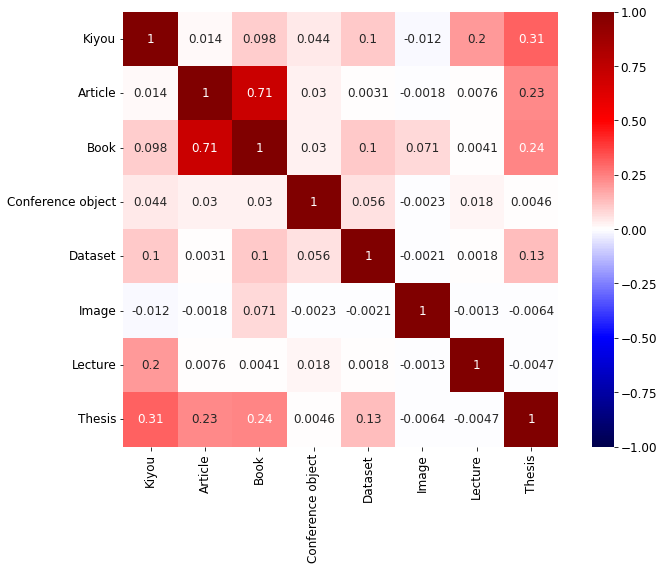

In [23]:
# 特徴量の確認（相関行列、散布図）
# 相関行列や散布図を用いて特徴量の分布などを確認していきます。
# ライブラリのインポート
import matplotlib.pyplot as plt
import seaborn as sns

# 相関行列
correlation_coefficients = df2205_all_dstd.corr()  # 相関行列の計算
# 相関行列のヒートマップ (相関係数の値あり) 
plt.rcParams['font.size'] = 12
plt.figure(figsize=(12, 8))  # この段階で画像のサイズを指定する
sns.heatmap(correlation_coefficients, vmax=1, vmin=-1, cmap='seismic', square=True, annot=True, xticklabels=1, yticklabels=1)
plt.xlim([0, correlation_coefficients.shape[0]])
plt.show()

In [24]:
# 行・列ごとに欠損値の個数をカウント
print(df2205_all.isnull().sum(axis=0))
# A value is trying to be set on a copy of a slice from a DataFrame
# df2205_all_dstd.dropna(how='all', axis=0, inplace=True)

conference paper               0
data paper                     0
departmental bulletin paper    0
editorial                      0
journal article                0
periodical                     0
review article                 0
article                        0
book                           0
book part                      0
cartographic material          0
map                            0
conference object              0
conference proceedings         0
conference poster              0
dataset                        0
image                          0
still image                    0
moving image                   0
video                          0
lecture                        0
patent                         0
internal report                0
report                         0
research report                0
technical report               0
policy report                  0
report part                    0
working paper                  0
sound                          0
thesis    

In [25]:
# 特徴量（変数）の標準化
df2205_all_std = df2205_all_dstd.apply(lambda x: (x-x.mean())/x.std(), axis=0)
# df2205_all_std.sample(3)
# df2205_all_std.describe().astype(int)
df2205_all_std.describe().round(2)

,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
count,792.00,792.00,792.00,792.00,792.00,792.00,792.00,792.00
mean,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.34,-0.05,-0.12,-0.08,-0.06,-0.04,-0.04,-0.18
25%,-0.32,-0.05,-0.12,-0.08,-0.06,-0.04,-0.04,-0.18
50%,-0.26,-0.05,-0.12,-0.08,-0.06,-0.04,-0.04,-0.18
75%,-0.08,-0.05,-0.12,-0.08,-0.06,-0.04,-0.04,-0.16
max,20.40,27.85,19.93,22.28,25.08,28.11,28.11,14.28


<AxesSubplot:>

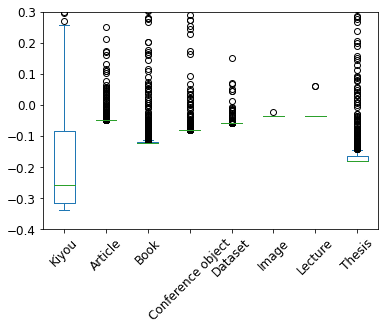

In [26]:
# 標準化後の箱ひげ図
# df2205_all_std[df2205_all_std<0.1].plot.box(rot=45)
df2205_all_std.plot.box(rot=45,ylim=[-0.4,0.3])

In [27]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  
# 主成分分析の実行
pca = PCA()
pca.fit(df2205_all_std)

# データを主成分に変換
pca_row = pca.transform(df2205_all_std)
pca_row


array([[ 0.63003495,  0.44933944,  0.16408473, ..., -0.26820148,
         0.5678263 ,  0.35396524],
       [-0.24770039, -0.17617936,  0.02787566, ...,  0.08246767,
        -0.01862162, -0.03363082],
       [ 0.02461823,  0.04440515, -0.03812945, ..., -0.185044  ,
        -0.40491581, -0.00674189],
       ...,
       [-0.28081035, -0.2624691 ,  0.01034671, ...,  0.11766926,
        -0.10503633, -0.02044763],
       [-0.27602687, -0.25000261,  0.01287916, ...,  0.1125836 ,
        -0.09255179, -0.02235224],
       [-0.27881377, -0.25726569,  0.01140373, ...,  0.11554655,
        -0.09982539, -0.0212426 ]])

# 寄与率
contribution ratio
データの全情報の中で、各要素のもつ情報が占める割合のこと。

例えば主成分分析では、各主成分の固有値をその総和で割ったものを寄与率とよぶ。主成分分析における寄与率は各主成分が全体の中でどれだけの変動の割合を占めるかを示し、値が大きいほど相対的に説明力が高い主成分であることを表す。

# 累積寄与率
cumulative contribution ratio
主成分分析や因子分析において、寄与率を大きい順に順次足したもの。

例えば、主成分分析において第1主成分から第k主成分までを足した累積寄与率を求めた場合、この値は第1～k主成分が全体の中でどれだけの割合を占めるかを示す。

       PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.23951  0.161185  0.128852  0.125751  0.124068  0.109746  0.076604   

        PC8  
0  0.034284  


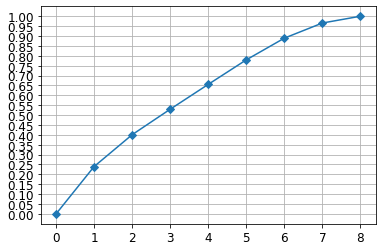

In [28]:
# 寄与率を求める
pca_col = ["PC{}".format(x + 1) for x in range(len(df2205_all_std.columns))]
# pca_col = ["PC{}".format(x + 1) for x in range(len(pca_row_df_o.columns))]
df_con_ratio = pd.DataFrame([pca.explained_variance_ratio_], columns = pca_col)
print(df_con_ratio)

# 累積寄与率を図示する
cum_con_ratio = np.hstack([0, pca.explained_variance_ratio_]).cumsum()
plt.plot(cum_con_ratio, 'D-')
plt.xticks(range(9))
plt.yticks(np.arange(0,1.05,0.05))
plt.grid()
plt.savefig("tex/picture/cumulative_contribution_ratio.png")   # プロットしたグラフをファイルに保存する
plt.show()

第1主成分の寄与率は，0.23951 であることが分かります．また，累積寄与率は表現したグラフから第5主成分までで約80％の情報を説明できているということが分かります．

一般的には，累積寄与率が80％以上になる主成分数を採用して分析結果に用いることが多いです80％以上を目安に主成分を選択します．

元のデータを各主成分に変換した値を主成分得点と言います。 複数の変数を持つデータをグラフで表したい時などで使用されます。 各データの変数から第1主成分得点と第2主成分得点を算出することで、各データの特徴を2次元のグラフに変換することが可能となります。

In [29]:
# 主成分得点
'''
pd.DataFrame(pca_row, columns=["PC{}".format(x + 1)
    # for x in range(len(df2205_all_std.columns))]).describe().round(2)
    for x in range(len(df2205_all_std.columns))])
#              #.head()
'''

std_index_0 = df2205_all_std.index.to_list()
# 主成分得点
pca_tokuten_0 = pd.DataFrame(pca_row, columns=["PC{}".format(x + 1) for x in range(len(df2205_all_std.columns))])
# pca_tokuten = pd.DataFrame(pca_row_o, columns=["PC{}".format(x + 1) for x in range(len(pca_row_df_o.columns))])
pca_tokuten_0['index'] = std_index_0
pca_tokuten_0.set_index('index', inplace=True)
pca_tokuten_0.sort_values('PC1', ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
index,,,,,,,,
東京工業大学,31.246182,-13.099775,3.571126,-0.888685,-4.086722,2.301353,0.674113,-5.176205
早稲田大学,9.957289,5.358538,-6.029250,-0.761980,3.768755,4.531870,0.473748,4.012299
日本貿易振興機構アジア経済研究所,9.259245,-4.373335,0.871986,0.839897,-0.841879,2.140423,2.780799,10.659591
筑波大学,7.108067,6.325333,-1.139067,-3.616805,3.691914,-6.633857,-6.992040,0.759859
東京大学,7.055639,7.245580,-0.972415,-3.740669,3.866032,-6.951795,-6.512765,0.313203
...,...,...,...,...,...,...,...,...
都留文科大学,-0.281351,-0.263878,0.010060,-0.030051,-0.033630,0.118244,-0.106448,-0.020232
琉球医学会,-0.281351,-0.263878,0.010060,-0.030051,-0.033630,0.118244,-0.106448,-0.020232
聖隷浜松病院,-0.281351,-0.263878,0.010060,-0.030051,-0.033630,0.118244,-0.106448,-0.020232


In [30]:
df2205_all_std.sort_values('Kiyou', ascending=False)

,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
機関名,,,,,,,,
京都大学,20.399387,0.251502,1.231779,0.918386,0.072518,-0.035548,-0.035775,-0.180812
北海道大学,5.537372,0.214086,0.116124,0.499662,0.051473,-0.035548,28.106636,-0.180812
東北大学,4.835657,-0.049408,-0.118506,-0.035472,-0.057858,-0.035548,-0.035775,4.018117
九州大学,4.705293,0.354841,0.492153,0.275531,-0.015768,-0.035548,-0.035775,2.984829
東京大学,4.364431,-0.004667,0.052417,-0.031997,-0.032707,-0.035548,0.059947,14.281055
...,...,...,...,...,...,...,...,...
アジア成長研究所,-0.337917,-0.049408,-0.121613,-0.081514,-0.057858,-0.035548,-0.035775,-0.180812
東京慈恵会医科大学,-0.337917,0.104017,0.043093,-0.081514,-0.057858,-0.035548,-0.035775,0.040666
農林水産省 農林水産政策研究所,-0.337917,-0.049408,-0.121613,-0.081514,-0.057858,-0.035548,-0.035775,-0.180812


In [31]:
pca_row

array([[ 0.63003495,  0.44933944,  0.16408473, ..., -0.26820148,
         0.5678263 ,  0.35396524],
       [-0.24770039, -0.17617936,  0.02787566, ...,  0.08246767,
        -0.01862162, -0.03363082],
       [ 0.02461823,  0.04440515, -0.03812945, ..., -0.185044  ,
        -0.40491581, -0.00674189],
       ...,
       [-0.28081035, -0.2624691 ,  0.01034671, ...,  0.11766926,
        -0.10503633, -0.02044763],
       [-0.27602687, -0.25000261,  0.01287916, ...,  0.1125836 ,
        -0.09255179, -0.02235224],
       [-0.27881377, -0.25726569,  0.01140373, ...,  0.11554655,
        -0.09982539, -0.0212426 ]])

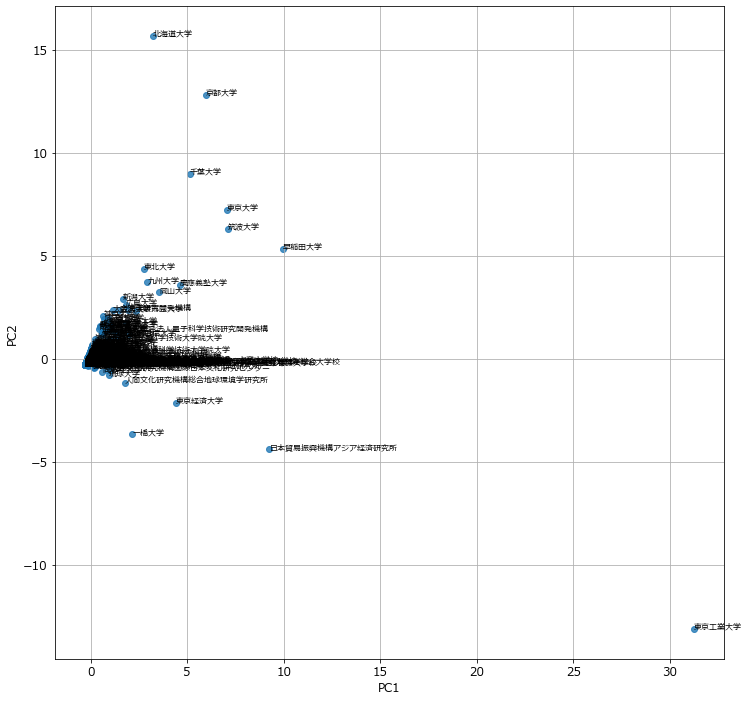

In [32]:
# 第一主成分と第二主成分でプロットする
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Meiryo" # "MS Gothic"
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(12, 12))
plt.scatter(pca_row[:, 0], pca_row[:, 1], alpha=0.8)  # c=list(df2205_all_std.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")


for k, v in pca_tokuten_0.iterrows():
             plt.annotate(k,xy=(v[0],v[1]),size=8)
plt.savefig('tex/picture/pc1pc2.png')
plt.show()

In [33]:
# pca_tokuten_0.iloc[:,0:2].sort_values("PC1", ascending=False)
pca_tokuten_0.loc['総合研究大学院大学',:]

PC1    0.906236
PC2    0.108000
PC3   -0.130078
PC4   -0.394757
PC5    0.339432
PC6   -0.489669
PC7   -0.998019
PC8    0.577129
Name: 総合研究大学院大学, dtype: float64

② 主成分負荷量を求める
principal component loading
主成分負荷量とは，各主成分に対する各変数の影響度合いになります．-1から1の間の値を取り，絶対値が大きいほど影響度が大きくなります．主成分負荷量を求めることで，各主成分が何を意味しているかが分かりやすくなります

        Kiyou   Article      Book  Conference object   Dataset     Image  \
PC1  0.247599  0.590835  0.617173           0.064170  0.160336  0.040013   
PC2  0.645282 -0.342666 -0.265366           0.123102  0.294776 -0.100862   
PC3  0.131083  0.112777  0.055440          -0.452699 -0.616093  0.145093   
PC4 -0.044571 -0.015558  0.056647           0.557800  0.044095  0.747003   
PC5  0.080780 -0.164704 -0.051673          -0.602772  0.236002  0.625173   
PC6 -0.263241  0.077504  0.131068          -0.310998  0.664685 -0.111804   
PC7  0.646217  0.037651  0.187528          -0.066651 -0.000472 -0.027097   
PC8 -0.098585 -0.697124  0.698126           0.012429 -0.091543 -0.071306   

      Lecture    Thesis  
PC1  0.060534  0.416671  
PC2  0.433031  0.309896  
PC3  0.590532 -0.112861  
PC4  0.250535 -0.246365  
PC5 -0.303664  0.248180  
PC6  0.435853 -0.408074  
PC7 -0.337970 -0.653008  
PC8  0.030341  0.048783  


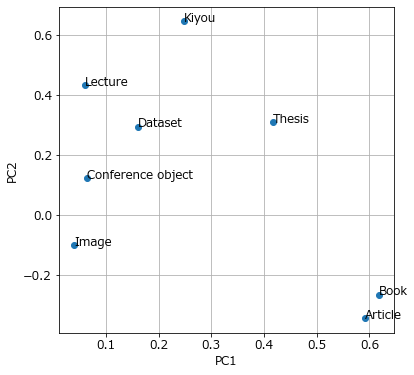

In [34]:
# 主成分負荷量を求める
df_pca = pd.DataFrame(pca_row, columns = pca_col)
df_pca_vec = pd.DataFrame(pca.components_, columns=df2205_all_std.columns,
                          index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))])
print(df_pca_vec)

# 主成分負荷量を図示する
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df2205_all_std.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig('tex/picture/principal_component_loading.png')
plt.show()

In [35]:
# 外れ値（例外的に、値が大きな機関）を削除する
# ndのままでやると、DataFrameと食い違ってしまってプロットしたときラベルがおかしくなる
# pca_row2 = np.delete(pca_row, np.where(pca_row > 15)[0], axis=0)
# pca_row2.shape
# nd配列pca_rowをDataFrameにする
pca_row_df = pd.DataFrame(pca_row, index= list(df2205_all_std.index), columns=["PC{}".format(x + 1)
    for x in range(len(df2205_all_std.columns))])
outlier = list(pca_row_df[pca_row_df[['PC1','PC2']] > 5].dropna(how='all').index)
pca_row_df_o = pca_row_df.drop(outlier)
print(outlier)

['早稲田大学', '筑波大学', '東京工業大学', '東京大学', '京都大学', '日本貿易振興機構アジア経済研究所', '北海道大学', '千葉大学']


In [36]:
pca_row_df_o

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
横浜国立大学,0.630035,0.449339,0.164085,-0.132411,0.112460,-0.268201,0.567826,0.353965
横浜商科大学,-0.247700,-0.176179,0.027876,-0.036108,-0.022651,0.082468,-0.018622,-0.033631
横浜市立大学,0.024618,0.044405,-0.038129,-0.193136,0.136938,-0.185044,-0.404916,-0.006742
安田女子大学,-0.258598,-0.204581,0.022106,-0.034146,-0.026207,0.094054,-0.047065,-0.029292
山梨県立大学,-0.223922,-0.149148,0.035406,-0.037261,-0.019611,0.071866,0.016901,-0.025499
...,...,...,...,...,...,...,...,...
九州大谷短期大学,-0.280186,-0.260843,0.010677,-0.030260,-0.033250,0.117006,-0.103408,-0.020696
芸術文化観光専門職大学,-0.280519,-0.261710,0.010501,-0.030200,-0.033358,0.117360,-0.104276,-0.020564
せとうち観光専門職短期大学,-0.280810,-0.262469,0.010347,-0.030148,-0.033453,0.117669,-0.105036,-0.020448
香川短期大学,-0.276027,-0.250003,0.012879,-0.031009,-0.031893,0.112584,-0.092552,-0.022352


In [37]:
# pandas.DataFrameをNumPy配列ndarrayに変換
pca_row_o = pca_row_df_o.to_numpy()
pca_row_o

array([[ 0.63003495,  0.44933944,  0.16408473, ..., -0.26820148,
         0.5678263 ,  0.35396524],
       [-0.24770039, -0.17617936,  0.02787566, ...,  0.08246767,
        -0.01862162, -0.03363082],
       [ 0.02461823,  0.04440515, -0.03812945, ..., -0.185044  ,
        -0.40491581, -0.00674189],
       ...,
       [-0.28081035, -0.2624691 ,  0.01034671, ...,  0.11766926,
        -0.10503633, -0.02044763],
       [-0.27602687, -0.25000261,  0.01287916, ...,  0.1125836 ,
        -0.09255179, -0.02235224],
       [-0.27881377, -0.25726569,  0.01140373, ...,  0.11554655,
        -0.09982539, -0.0212426 ]])

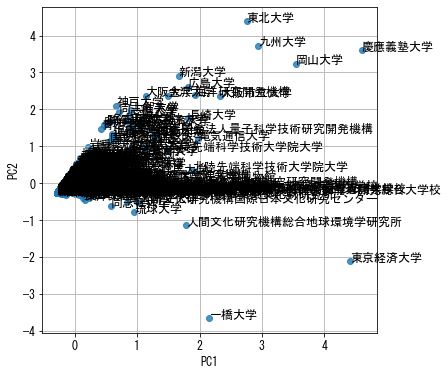

In [38]:
# 外れ値を除外した後で、
# 第一主成分と第二主成分でプロットする
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
plt.figure(figsize=(6, 6))
# ラベルにインデクス（機関名）を追加する
for x, y, name in zip(pca_row_o[:, 0], pca_row_o[:, 1], list(pca_row_df_o.index)):
    plt.text(x, y, name)
plt.scatter(pca_row_o[:, 0], pca_row_o[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig('tex/picture/pc1pc2_outlier.png')
plt.show()


In [39]:
# 外れ値の抽出その２
pca_row_df_o = pd.DataFrame(pca_row_o, index= list(pca_row_df_o.index), columns=["PC{}".format(x + 1)
    for x in range(len(df2205_all_std.columns))])
outlier2 = list(pca_row_df_o[pca_row_df_o[['PC1','PC2']] > 2].dropna(how='all').index)
pca_row_df_o2 = pca_row_df_o.drop(outlier2)
print(outlier2)

['東京経済大学', '東北大学', '大阪大学', '大阪市立大学', '岡山大学', '新潟大学', '九州大学', '神戸大学', '慶應義塾大学', '金沢大学', '海洋研究開発機構', '宇宙航空研究開発機構', '一橋大学', '広島大学']


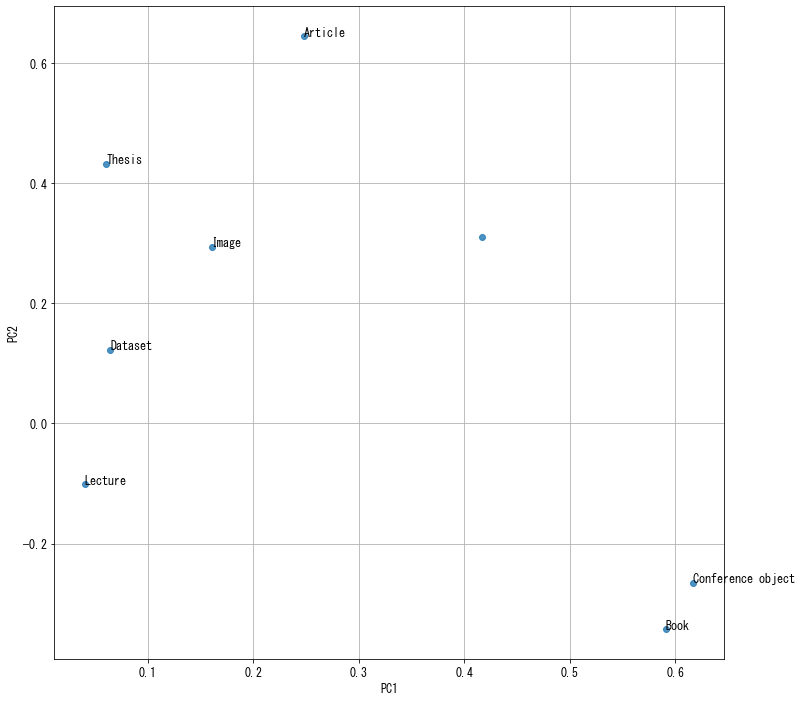

In [40]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
# 第一主成分と第二主成分における観測変数の寄与度をプロットすることにより、各成分が何を考慮した値なのかのヒントが得られます。
plt.figure(figsize=(12, 12))
pca_list = []
# for x, y, name in zip(pca.components_[0], pca.components_[1], df2205_all_std.columns[1:]):
for x, y, name in zip(pca.components_[0], pca.components_[1], df2205_all_dstd.columns[1:]):
    plt.text(x, y, name)
    pca_list.append([x, y, name])
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


第1主成分に対して主成分負荷量が大きい項目は，Conference object と Bookであること、
第2主成分に対しては、'Article''Thesis'
がわかります．
kiyou は、全体的に量が多く、主成分には寄与していません。

In [41]:
len(df2205_all_std.columns) # 36
# std_index = df2205_all_std.index.to_list()
std_index = pca_row_df_o.index.to_list()
# PCA の固有ベクトル
# pd.DataFrame(pca.components_, columns=df.columns[1:], index=["PC{}".format(x + 1) for x in range(len(df2205_all_std.columns))])
# 主成分得点
# pca_tokuten = pd.DataFrame(pca_row, columns=["PC{}".format(x + 1) for x in range(len(df2205_all_std.columns))])
pca_tokuten = pd.DataFrame(pca_row_o, columns=["PC{}".format(x + 1) for x in range(len(pca_row_df_o.columns))])
pca_tokuten['index'] = std_index
pca_tokuten.set_index('index', inplace=True)
pca_tokuten.head()
# pca_tokuten.describe()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
index,,,,,,,,
横浜国立大学,0.630035,0.449339,0.164085,-0.132411,0.112460,-0.268201,0.567826,0.353965
横浜商科大学,-0.247700,-0.176179,0.027876,-0.036108,-0.022651,0.082468,-0.018622,-0.033631
横浜市立大学,0.024618,0.044405,-0.038129,-0.193136,0.136938,-0.185044,-0.404916,-0.006742
安田女子大学,-0.258598,-0.204581,0.022106,-0.034146,-0.026207,0.094054,-0.047065,-0.029292
山梨県立大学,-0.223922,-0.149148,0.035406,-0.037261,-0.019611,0.071866,0.016901,-0.025499


In [42]:
pca_row

array([[ 0.63003495,  0.44933944,  0.16408473, ..., -0.26820148,
         0.5678263 ,  0.35396524],
       [-0.24770039, -0.17617936,  0.02787566, ...,  0.08246767,
        -0.01862162, -0.03363082],
       [ 0.02461823,  0.04440515, -0.03812945, ..., -0.185044  ,
        -0.40491581, -0.00674189],
       ...,
       [-0.28081035, -0.2624691 ,  0.01034671, ...,  0.11766926,
        -0.10503633, -0.02044763],
       [-0.27602687, -0.25000261,  0.01287916, ...,  0.1125836 ,
        -0.09255179, -0.02235224],
       [-0.27881377, -0.25726569,  0.01140373, ...,  0.11554655,
        -0.09982539, -0.0212426 ]])

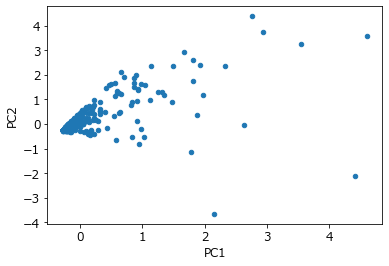

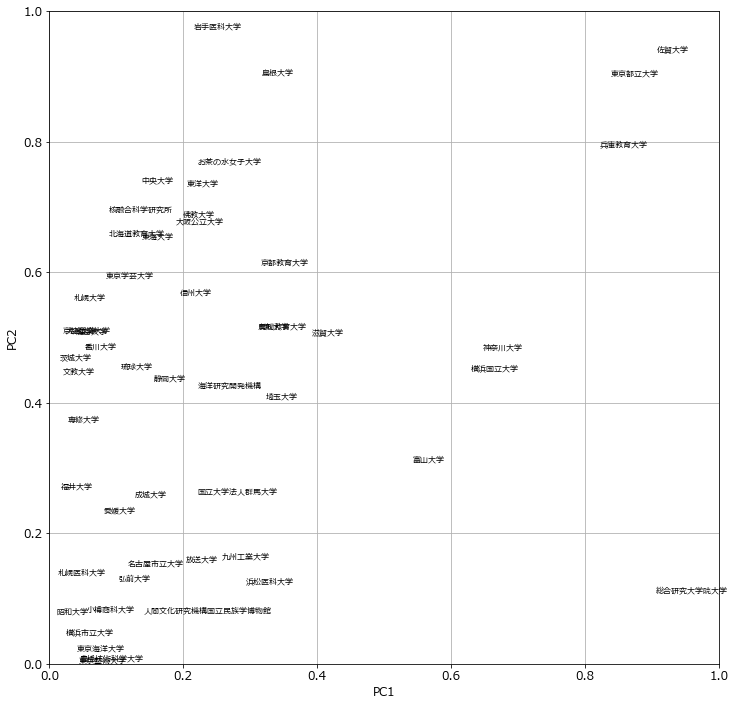

In [43]:
plt.rcParams["font.family"] = "Meiryo"
# 主成分得点を求める
fig, ax = plt.subplots()
pca_tokuten.plot(0,1,kind='scatter',ax=ax)

plt.figure(figsize=(12,12))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")

for k, v in pca_tokuten.iterrows():
             plt.annotate(k,xy=(v[0],v[1]),size=8)

In [44]:
pca_tokuten.loc['岐阜大学',:]

PC1    1.116734
PC2    0.979980
PC3   -0.191493
PC4   -0.728470
PC5    0.678860
PC6   -1.158847
PC7   -1.415323
PC8    0.024622
Name: 岐阜大学, dtype: float64

        Kiyou   Article      Book  Conference object   Dataset     Image  \
PC1  0.247599  0.590835  0.617173           0.064170  0.160336  0.040013   
PC2  0.645282 -0.342666 -0.265366           0.123102  0.294776 -0.100862   
PC3  0.131083  0.112777  0.055440          -0.452699 -0.616093  0.145093   
PC4 -0.044571 -0.015558  0.056647           0.557800  0.044095  0.747003   
PC5  0.080780 -0.164704 -0.051673          -0.602772  0.236002  0.625173   
PC6 -0.263241  0.077504  0.131068          -0.310998  0.664685 -0.111804   
PC7  0.646217  0.037651  0.187528          -0.066651 -0.000472 -0.027097   
PC8 -0.098585 -0.697124  0.698126           0.012429 -0.091543 -0.071306   

      Lecture    Thesis  
PC1  0.060534  0.416671  
PC2  0.433031  0.309896  
PC3  0.590532 -0.112861  
PC4  0.250535 -0.246365  
PC5 -0.303664  0.248180  
PC6  0.435853 -0.408074  
PC7 -0.337970 -0.653008  
PC8  0.030341  0.048783  
[0.24759915 0.59083471 0.61717336 0.06417006 0.16033621 0.04001343
 0.0605341  0.

ValueError: x and y must be the same size

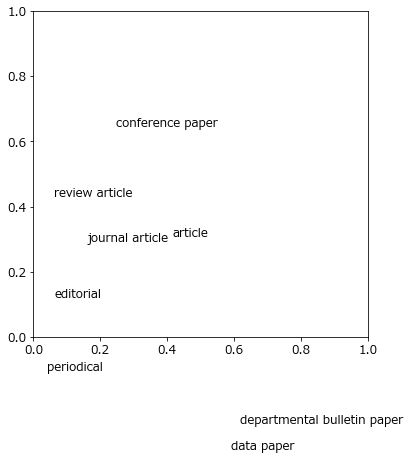

In [45]:
# 主成分負荷量を求める
df_pca = pd.DataFrame(pca_row, columns=pca_col)
df_pca_vec = pd.DataFrame(pca.components_, columns=df2205_all_std.columns,
                          index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))])
print(df_pca_vec)

print(pca.components_[0])
print(pca.components_)

# 主成分負荷量を図示する
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df2205_all.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# ValueError: Shape of passed values is (36, 36), indices imply (36, 47)
# TypeError: only size-1 arrays can be converted to Python scalars 
# plt.scatter(pca.components_[0], pca.components_)


# 構成比率

In [47]:
# Total列を追加
df2205_all_dsum = pd.concat([df2205_all_d, pd.DataFrame(
    df2205_all_d.sum(axis=1), columns=['Total'])], axis=1)
df2205_honbun_dsum = pd.concat([df2205_honbun_d, pd.DataFrame(
    df2205_honbun_d.sum(axis=1), columns=['Total'])], axis=1)
df2205_sabun_dsum = pd.concat([df2205_sabun_d, pd.DataFrame(
    df2205_sabun_d.sum(axis=1), columns=['Total'])], axis=1)
df2205_all_dsum
# Totalの降順にソートする
df2205_all_dsum = df2205_all_dsum.sort_values(by='Total', ascending=False)
df2205_honbun_dsum = df2205_honbun_dsum.sort_values(by='Total', ascending=False)
df2205_sabun_dsum = df2205_sabun_dsum.sort_values(by='Total', ascending=False)
# df2205i_sabun_dsum

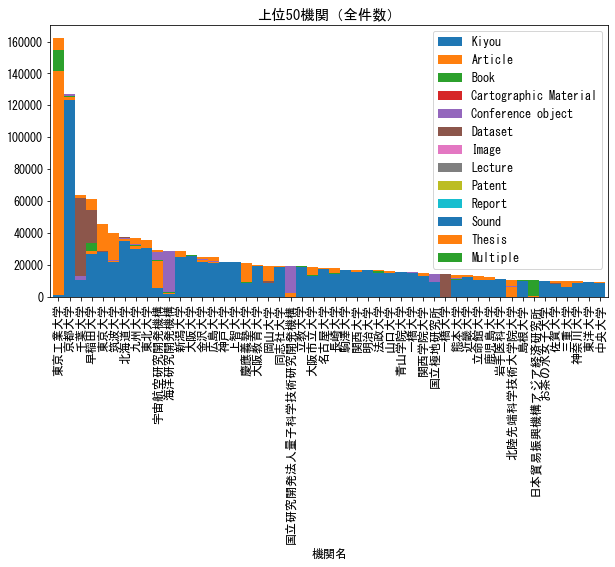

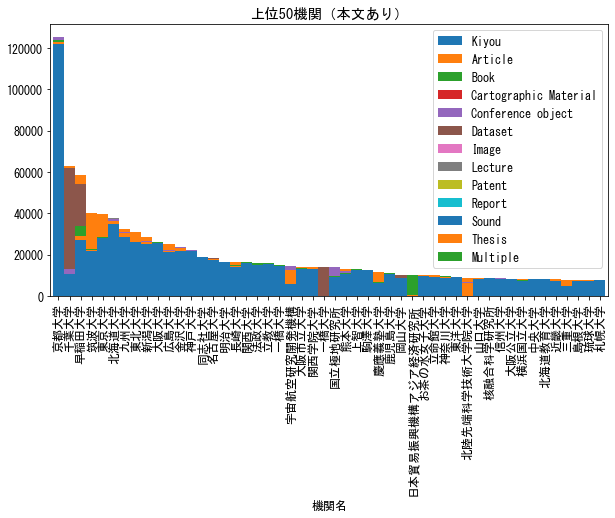

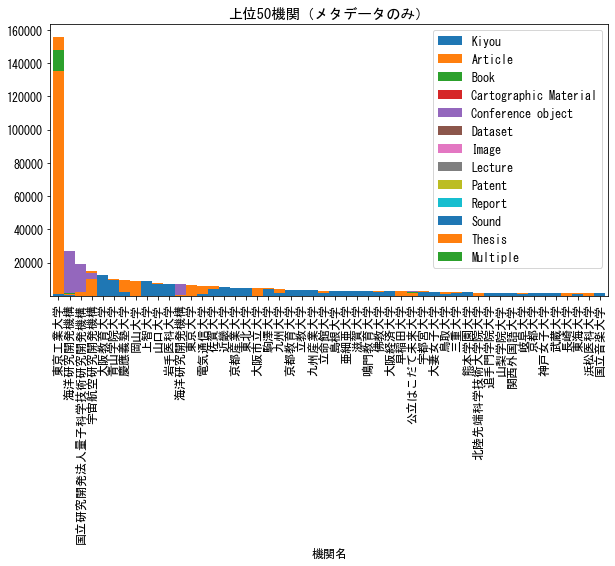

In [48]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
# plt.legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
stack_all = df2205_all_dsum.iloc[:50, ]\
     .drop("Total", axis=1)\
     .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関（全件数）',)\
     .get_figure().savefig('tex/picture/stack_all.png', bbox_inches='tight')
     # .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)\

stack_honbun = df2205_honbun_dsum.iloc[:50, ]\
     .drop("Total", axis=1)\
     .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関（本文あり）',)\
     .get_figure().savefig('tex/picture/stack_honbun.png', bbox_inches='tight')

     # .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
stack_sabun = df2205_sabun_dsum.iloc[:50, ]\
     .drop("Total", axis=1)\
     .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関（メタデータのみ）',)\
    .get_figure().savefig('tex/picture/stack_sabun.png', bbox_inches='tight')
    # .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
# 全てでグラフを描くと32.7s
# df2205i_all_d3.plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',).legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
# stack_all.show()
# stack_all.savefig('stack_all.png')


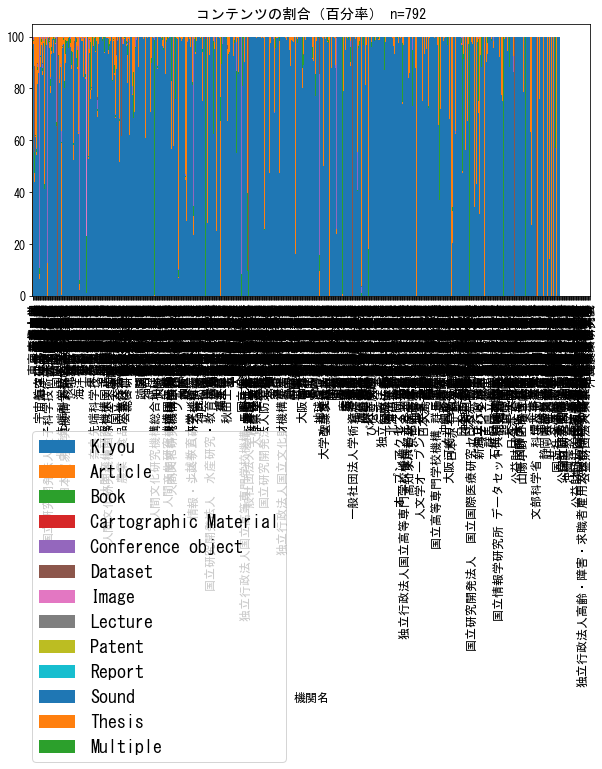

In [60]:
# 行ごとの百分率に変換する
# .div 列和に対する各列要素の率を計算, .mul 乗算
df2205_all_100 = df2205_all_dsum.div(
    df2205_all_dsum['Total'], axis=0).mul(100)  # .round(2) 四捨五入
# 判例の位置調整　https://qiita.com/matsui-k20xx/items/291400ed56a39ed63462
#df2205i_all_d4.iloc[:50, ].drop("Total", axis=1)\
#    .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
#    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
# 行数の取得
lendf = len(df2205_all_100)
title100 = "コンテンツの割合（百分率） n=" + str(lendf)
df2205_all_100.drop("Total", axis=1)\
    .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title=title100,)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)\
    .get_figure().savefig('tex/picture/percentage.png', bbox_inches='tight')


In [ ]:
# Kiyouの降順にソートする
df2205i_all_d5 = df2205i_all_d4.sort_values(by='Kiyou', ascending=False)
df2205i_all_d5.drop("Total", axis=1)\
    .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='資料タイプ別百分率',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
# 特徴量スケーリング（正規化）
import numpy as np

df2205i_all_d3.head()

# Min-Max Normalization
df_norm = (df2205i_all_d3-df2205i_all_d3.min()) / \
    (df2205i_all_d3.max()-df2205i_all_d3.min())
    
print("Scaled Dataset Using Pandas")
df_norm.head()


In [ ]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
# df_norm.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
#     .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df_norm.drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
print(df2205i_all_d3.columns.to_list())

In [ ]:
# 特徴量スケーリング（標準化）
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df2205i_honbun_d.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Kiyou', 'Article', 'Book', 'Cartographic Material', 'Conference object',
                         'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple', 'Total'])
df_scaled.head()


In [ ]:
import seaborn as sns
cor = df_scaled[['Kiyou', 'Article', 'Book', 'Cartographic Material', 'Conference object',
                         'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple']].corr()
cor.dropna(how="all", axis=0, inplace=True)
cor.dropna(how="all", axis=1, inplace=True)
p = sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)
p.set(title = "資源タイプごとの相関係数（本文あり）")
# ヒートマップを出力
#https://qiita.com/Tom-tom-tom/items/f0e7800fbe72fd729a8d



In [ ]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
# df_norm.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
#     .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df_scaled.drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
# 転置
df2205T = df2205i_all_d3.T
# df2205T.loc['Total',]
df2205T = df2205T.drop('Total', axis=0)

In [ ]:
col_list = df2205T.columns.to_list()

In [ ]:
# 特徴量スケーリング（標準化）
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df_scaled2 = std_scaler.fit_transform(df2205T.to_numpy())
df_scaled2 = pd.DataFrame(df_scaled2, columns=col_list)

print("Scaled Dataset Using StandardScaler")
df_scaled2  # .head()

In [ ]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
df_scaled2.T.plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
df2205_all_d.drop(['Total'], axis=1, inplace=True)
df2205_honbun_d.drop(['Total'], axis=1, inplace=True)
df2205_sabun_d.drop(['Total'], axis=1, inplace=True)

In [ ]:
df2205i_all_d3.head()


In [ ]:
df2205_2jiku = df2205_all_d.copy()
df2205_2jikuh = df2205_honbun_d.copy()
df2205_2jiku['igai'] = df2205_2jiku.loc[:, ['Article', 'Book', 'Cartographic Material', 'Conference object','Dataset',\
    'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple']].sum(axis=1).copy()
df2205_2jiku = df2205_2jiku.drop(['Article', 'Book', 'Cartographic Material', 'Conference object',
                                 'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple', 'Total'], axis=1)
df2205_2jikuh['igai'] = df2205_2jikuh.loc[:, ['Article', 'Book', 'Cartographic Material', 'Conference object', 'Dataset',
                                            'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple']].sum(axis=1).copy()
df2205_2jikuh = df2205_2jikuh.drop(['Article', 'Book', 'Cartographic Material', 'Conference object',
                                 'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple', 'Total'], axis=1)
# kiyou = df2205i_all_d3.loc[:,'Kiyou'].c
# print(df2205_2jiku['kiyou'])
df2205_2jikuh.head()


In [ ]:
df2205_2jiku.plot.scatter(x='Kiyou', y='igai', alpha=0.5)
df2205_2jikuh.plot.scatter(x='Kiyou', y='igai', alpha=0.5)

In [ ]:
# 各列の最大値のindexを表示
print(df2205_2jiku.idxmax())
print(df2205_2jikuh.idxmax())


In [ ]:
# 六角形ビニング図（hexbin plot）https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html
# 外れ値との差が多すぎると意味がない
df2205_2jiku.plot.hexbin(x='Kiyou', y='igai', gridsize=200, sharex=False)


In [ ]:
# 特徴量スケーリング（標準化）
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df_scaled3 = std_scaler.fit_transform(df2205_2jiku.to_numpy())
df_scaled3 = pd.DataFrame(df_scaled3, columns=['Kiyou', 'igai'])

print("Scaled Dataset Using StandardScaler")
df_scaled3.head()


In [ ]:
df_scaled3.plot.scatter(x='Kiyou', y='igai', alpha=0.5)
